In [1]:
import numpy as np
from obspy import UTCDateTime
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter, date2num
from matplotlib.gridspec import GridSpec

In [5]:
file_path = "../catalog/alleventsfinal.txt"

with open(file_path, 'r') as file:
    lines = file.readlines()

eventsA = []
eventsB = []
current_p = None

for line in lines:

    parts = line.split()
    timestamp = parts[1] + "T" + parts[2]
    phase_type = parts[-3]
    event_type = parts[3]
    
    if event_type == '0':
    
        if phase_type == 'P':
            if current_p is not None:
                eventsA.append((current_p, None))
            current_p = timestamp
        elif phase_type == 'S':
            if current_p is not None:
                eventsA.append((current_p, timestamp))
                current_p = None
                
    if event_type == '1':
    
        if phase_type == 'P':
            if current_p is not None:
                eventsB.append((current_p, None))
            current_p = timestamp
        elif phase_type == 'S':
            if current_p is not None:
                eventsB.append((current_p, timestamp))
                current_p = None

# if current_p is not None:
#     events.append((current_p, None))
    
eventsA_array = np.array(eventsA, dtype=object)
eventsB_array = np.array(eventsB, dtype=object)

PSdiffA = []
for event in eventsA_array:
    if event[1] is not None:
        PSdiffA.append((UTCDateTime(event[1]) - UTCDateTime(event[0])))
        
PSdiffB = []
for event in eventsB_array:
    if event[1] is not None:
        PSdiffB.append((UTCDateTime(event[1]) - UTCDateTime(event[0])))

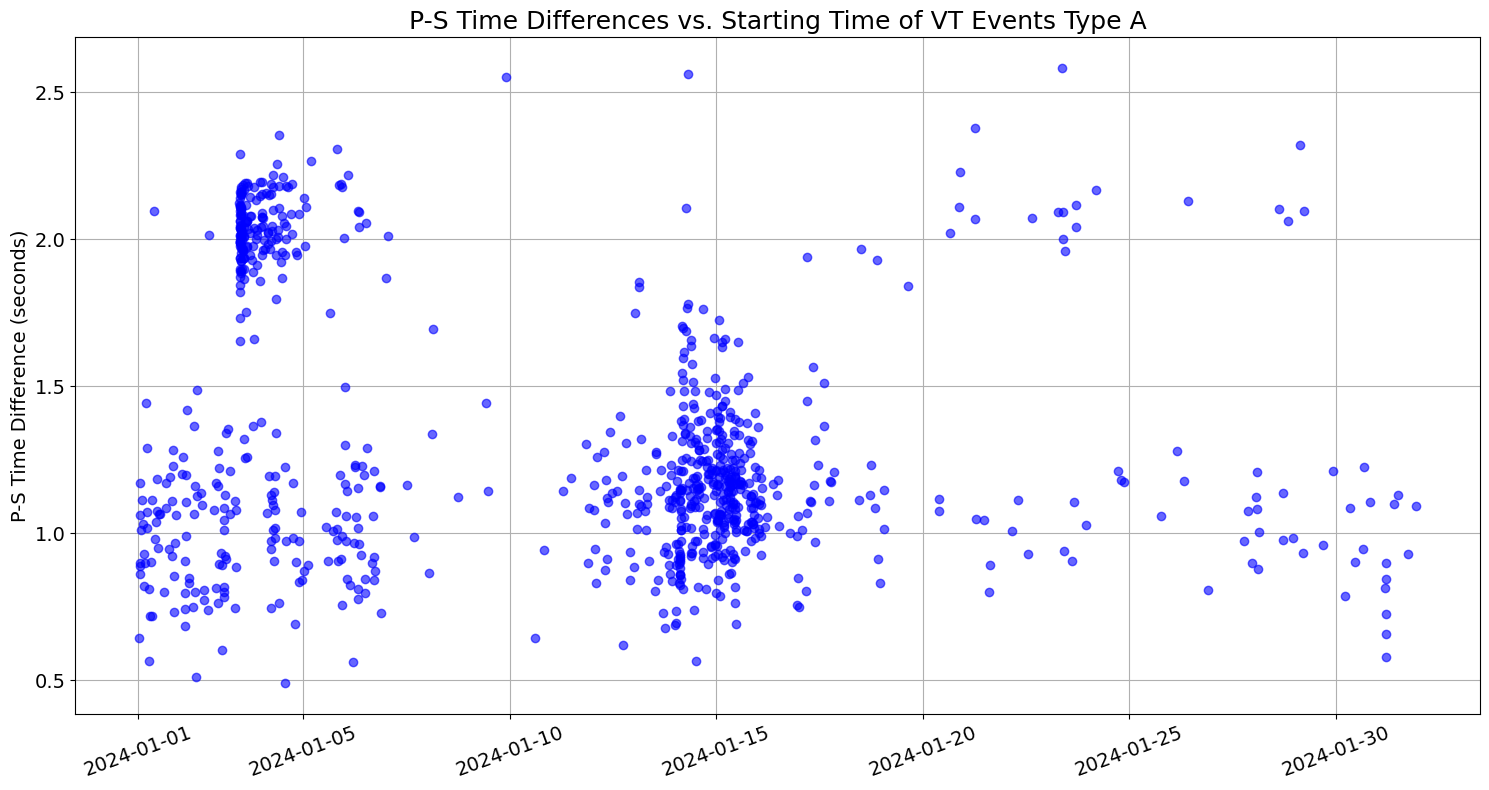

In [9]:
file_path = "../catalog/alleventsfinal.txt"

with open(file_path, 'r') as file:
    lines = file.readlines()

eventsA = []
eventsB = []
current_p_A = None
current_p_B = None

for line in lines:
    parts = line.split()
    timestamp = parts[1] + "T" + parts[2]
    phase_type = parts[-3]
    event_type = parts[3]
    
    if event_type == '0':
        if phase_type == 'P':
            if current_p_A is not None:
                eventsA.append((current_p_A, None))
            current_p_A = timestamp
        elif phase_type == 'S':
            if current_p_A is not None:
                eventsA.append((current_p_A, timestamp))
                current_p_A = None
                
    elif event_type == '1':
        if phase_type == 'P':
            if current_p_B is not None:
                eventsB.append((current_p_B, None))
            current_p_B = timestamp
        elif phase_type == 'S':
            if current_p_B is not None:
                eventsB.append((current_p_B, timestamp))
                current_p_B = None

eventsA_array = np.array(eventsA, dtype=object)
eventsB_array = np.array(eventsB, dtype=object)

PSdiffA = []
PtimesA = []
for event in eventsA_array:
    if event[1] is not None:
        PSdiffA.append(UTCDateTime(event[1]) - UTCDateTime(event[0]))
        PtimesA.append(UTCDateTime(event[0]).datetime)

PSdiffB = []
PtimesB = []
for event in eventsB_array:
    if event[1] is not None:
        PSdiffB.append(UTCDateTime(event[1]) - UTCDateTime(event[0]))
        PtimesB.append(UTCDateTime(event[0]).datetime)

# Convert to numpy arrays for easier plotting
PtimesA = np.array(PtimesA, dtype='datetime64')
PtimesB = np.array(PtimesB, dtype='datetime64')
PSdiffA = np.array(PSdiffA)
PSdiffB = np.array(PSdiffB)

# Create the plot
fig = plt.figure(figsize=(15, 8))

# Scatter plot for Events Type A
plt.scatter(PtimesA, PSdiffA, color='blue', label='Events Type A', alpha=0.6, zorder=2)

# Scatter plot for Events Type B
plt.scatter(PtimesB, PSdiffB, color='red', label='Events Type B', alpha=0.6, zorder=3)

# Formatting the plot
plt.ylabel('P-S Time Difference (seconds)', fontsize=14)
plt.title('P-S Time Differences vs. Starting Time of VT Events Type A', fontsize=18)
plt.grid(True)
plt.tick_params(axis='y', labelsize=14)
plt.tick_params(axis='x', labelsize=14, rotation=20)
xticks = ['2024-01-01', '2024-01-05', '2024-01-10', '2024-01-15', '2024-01-20', '2024-01-25', '2024-01-30']
xticks_datetime = [pd.to_datetime(date) for date in xticks]
plt.xticks(xticks_datetime)

# Show the plot
plt.tight_layout()
plt.show()

fig.savefig("../figures/" + 'PSdif_vsP')

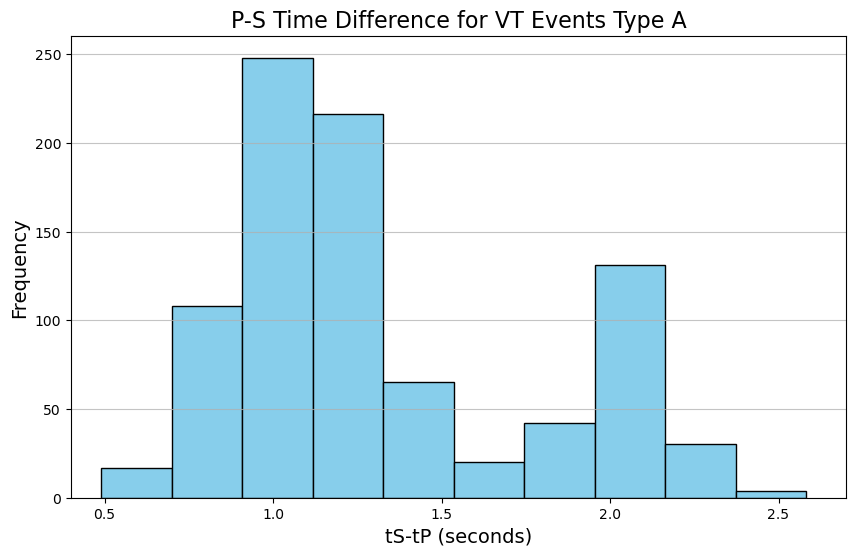

In [10]:
fig = plt.figure(figsize=(10, 6))
plt.hist(PSdiffA, bins=10, color='skyblue', edgecolor='black')
plt.title('P-S Time Difference for VT Events Type A', fontsize=16)
plt.xlabel('tS-tP (seconds)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.xlim(0.4, 2.7)

plt.show()
fig.savefig("../figures/" + 'PSdifA')

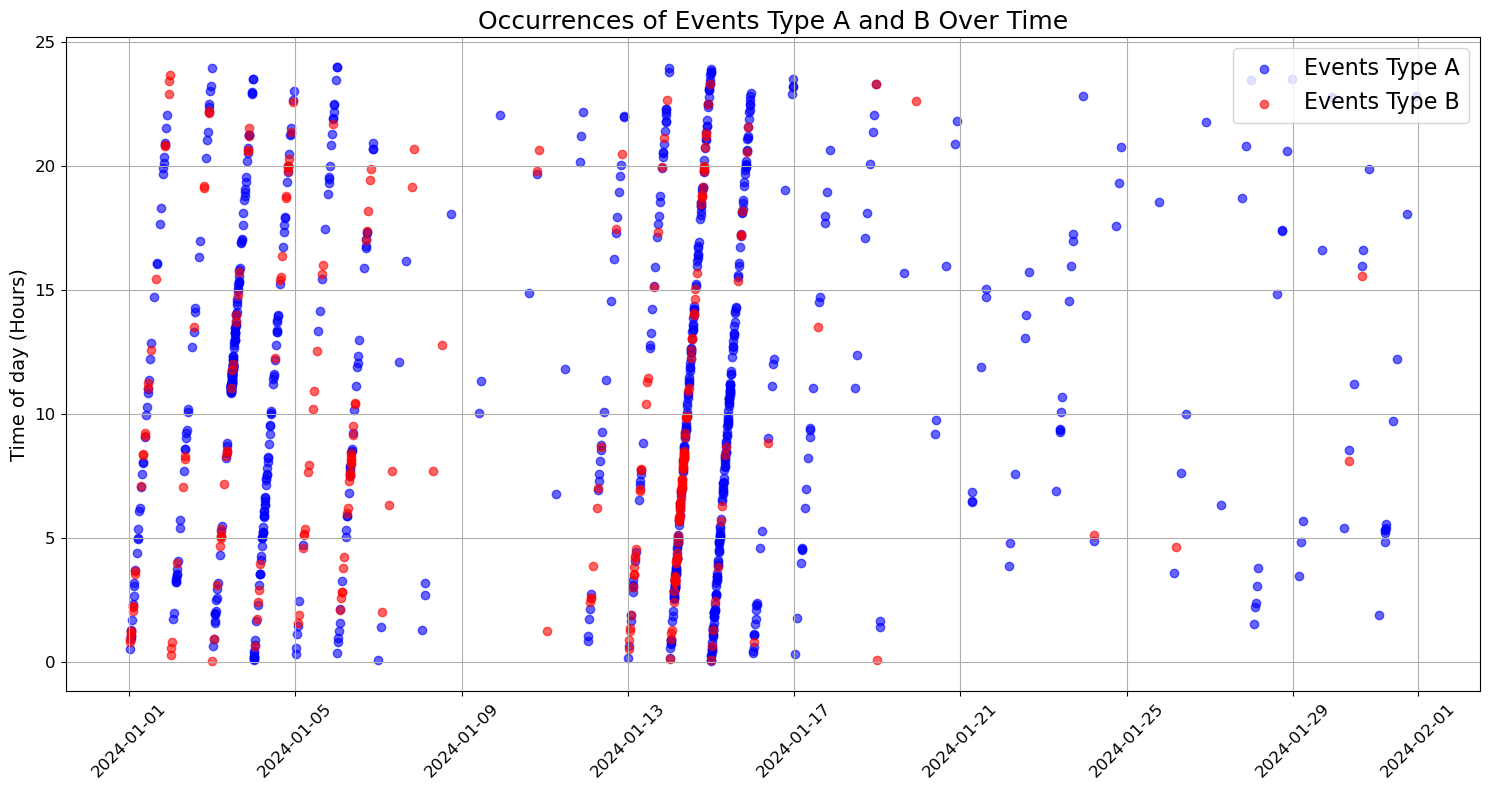

In [12]:
eventsA_P = eventsA_array[:, 0]
eventsB_P = eventsB_array[:, 0]

df_A = pd.DataFrame(eventsA_P, columns=['Pwave'])
df_B = pd.DataFrame(eventsB_P, columns=['Pwave'])

df_A['Pwave'] = pd.to_datetime(df_A['Pwave'])
df_B['Pwave'] = pd.to_datetime(df_B['Pwave'])

df_A['date'] = df_A['Pwave'].dt.date
df_A['time'] = df_A['Pwave'].dt.time
df_B['date'] = df_B['Pwave'].dt.date
df_B['time'] = df_B['Pwave'].dt.time

# convert time to hours
def time_to_hours(t):
    return t.hour + t.minute / 60 + t.second / 3600

df_A['time_hours'] = df_A['time'].apply(time_to_hours)
df_B['time_hours'] = df_B['time'].apply(time_to_hours)

plt.figure(figsize=(15, 8))

plt.scatter(df_A['Pwave'], df_A['time_hours'], color='blue', label='Events Type A', alpha=0.6)
plt.scatter(df_B['Pwave'], df_B['time_hours'], color='red', label='Events Type B', alpha=0.6)

plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.yticks(size = 12)
plt.xticks(rotation=45, size = 12)

plt.ylabel('Time of day (Hours)', size = 14)
plt.title('Occurrences of Events Type A and B Over Time', size = 18)
plt.legend(loc = 'upper right', fontsize = 16)
plt.grid(True)

plt.tight_layout()
plt.show()

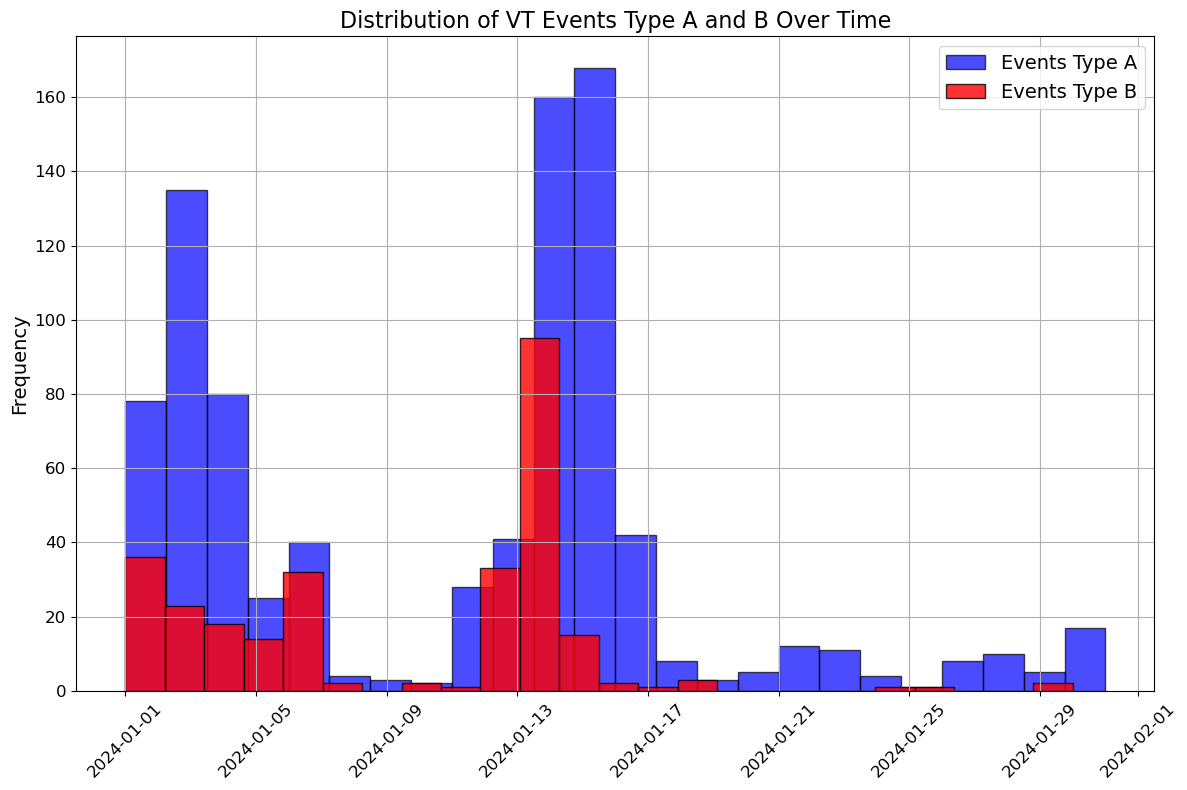

In [13]:
plt.figure(figsize=(12, 8))

plt.hist(df_A['date'], bins=24, alpha=0.7, label='Events Type A', color='blue', edgecolor='black')
plt.hist(df_B['date'], bins=24, alpha=0.8, label='Events Type B', color='red', edgecolor='black')

plt.ylabel('Frequency', fontsize = 14)
plt.title('Distribution of VT Events Type A and B Over Time', fontsize = 16)
plt.legend(loc='upper right', fontsize = 14)
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.yticks(size = 12)
plt.xticks(rotation=45, size = 12)

plt.grid(True)
plt.tight_layout()
plt.show()

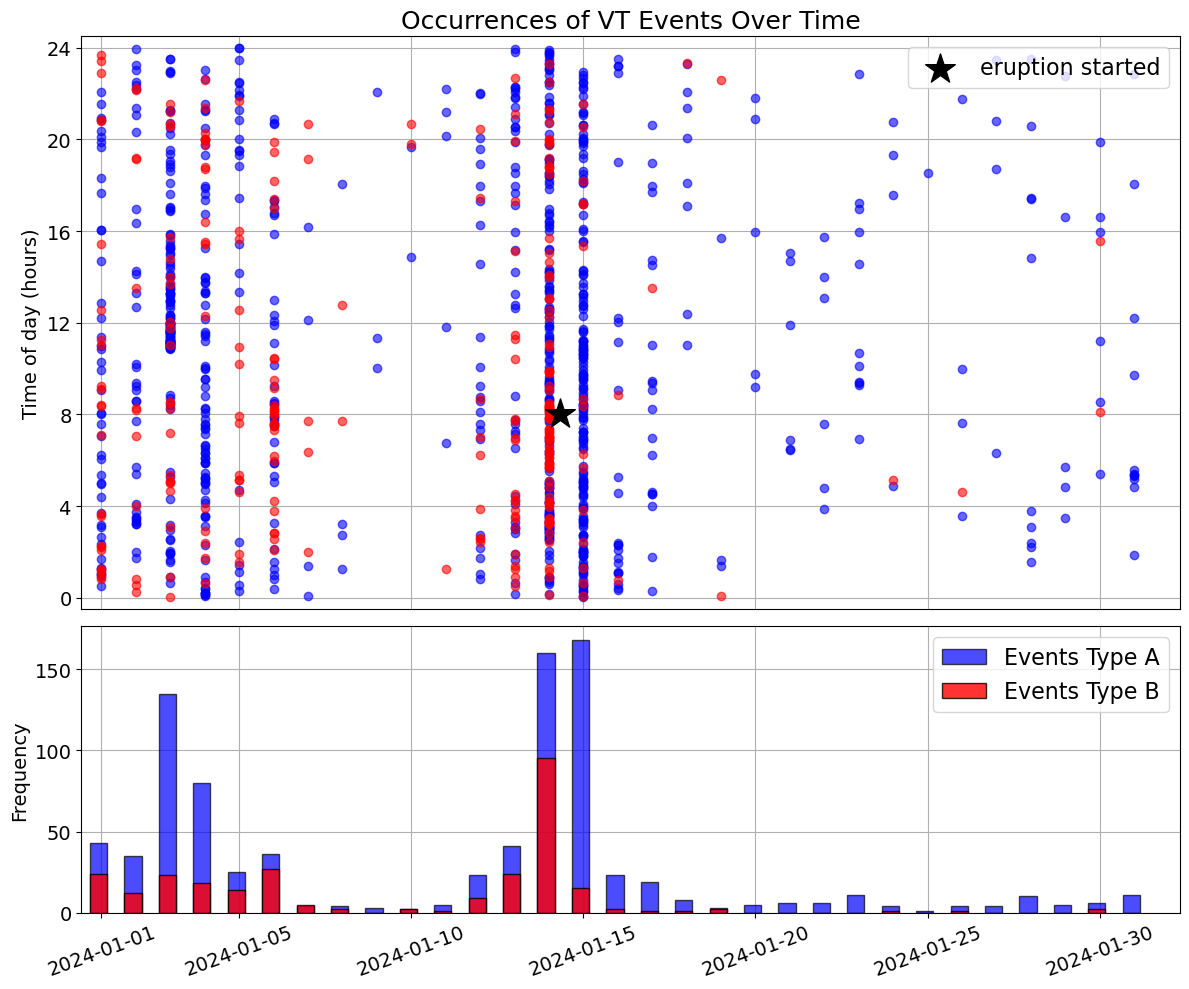

In [26]:
# Extract the first column
eventsA_first_col = eventsA_array[:, 0]
eventsB_first_col = eventsB_array[:, 0]

# Convert to pandas DataFrame for easier handling
df_A = pd.DataFrame(eventsA_first_col, columns=['start'])
df_B = pd.DataFrame(eventsB_first_col, columns=['start'])

# Convert 'start' to datetime
df_A['start'] = pd.to_datetime(df_A['start'])
df_B['start'] = pd.to_datetime(df_B['start'])

# Extract date and time
df_A['date'] = df_A['start'].dt.date
df_A['time'] = df_A['start'].dt.time
df_B['date'] = df_B['start'].dt.date
df_B['time'] = df_B['start'].dt.time

# Function to convert time to hours
def time_to_hours(t):
    return t.hour + t.minute / 60 + t.second / 3600

df_A['time_hours'] = df_A['time'].apply(time_to_hours)
df_B['time_hours'] = df_B['time'].apply(time_to_hours)

# Convert dates to numerical format for plotting
df_A['date_num'] = date2num(pd.to_datetime(df_A['date']))
df_B['date_num'] = date2num(pd.to_datetime(df_B['date']))

fig = plt.figure(figsize=(12, 10))

# Create GridSpec for subplot size adjustment
gs = GridSpec(2, 1, height_ratios=[3, 1.5])

# Create ax1 before ax0 to share x-axis
ax1 = plt.subplot(gs[1])
ax0 = plt.subplot(gs[0], sharex=ax1)

# Scatter plot on top
ax0.scatter(df_A['date_num'], df_A['time_hours'], color='blue', alpha=0.6, zorder=2)
ax0.scatter(df_B['date_num'], df_B['time_hours'], color='red', alpha=0.6, zorder=3)
ax0.scatter(UTCDateTime(2024, 1, 14, 7, 57, 0).datetime, 8, marker='*', color='k', s = 500, zorder=4, label = 'eruption started')
ax0.legend(loc='upper right', fontsize=16)
ax0.tick_params(axis='y', labelsize=14)
ax0.set_yticks([0, 4, 8, 12, 16, 20, 24])
ax0.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
ax0.set_ylabel('Time of day (hours)', size=14)
ax0.set_title('Occurrences of VT Events Over Time', size=18)
ax0.set_ylim(-0.5, 24.5)

# Set limits and grid
start_date = UTCDateTime(2023,12,31,10,0,0).datetime
end_date = UTCDateTime(2024,2,1,8,0,0).datetime
ax0.set_xlim(start_date, end_date)
ax0.grid(True)

# Add smaller histogram at the bottom, single color
ax1.grid(True, zorder=1)  # Set grid behind the bars

# Define the bins to align with grid lines in the scatter plot
bins = pd.date_range(start=start_date, end=end_date, freq='D').to_pydatetime()

ax1.hist(df_A['date_num'], bins=bins, alpha=0.7, label='Events Type A', color='blue', edgecolor='black', rwidth=0.5, align='mid', zorder=2)
ax1.hist(df_B['date_num'], bins=bins, alpha=0.8, label='Events Type B', color='red', edgecolor='black', rwidth=0.5, align='mid', zorder=2)

# Set specific x-ticks
xticks = ['2024-01-01', '2024-01-05', '2024-01-10', '2024-01-15', '2024-01-20', '2024-01-25', '2024-01-30']
xticks_datetime = [pd.to_datetime(date) for date in xticks]

ax0.set_xticks(xticks_datetime)
ax1.set_xticks(xticks_datetime)

ax0.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
ax1.tick_params(axis='y', labelsize=14)
ax1.tick_params(axis='x', labelsize=14, rotation=20)

ax1.set_ylabel('Frequency', size=14)
ax1.legend(loc='upper right', fontsize=16)

plt.tight_layout()
plt.show()

save_name = 'eventsintime' + '.png'
fig.savefig("../figures/" + save_name)